![](https://media.giphy.com/media/dVuyBgq2z5gVBkFtDc/giphy.gif)

**The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The outbreak was identified in Wuhan, China, in December 2019, declared to be a Public Health Emergency of International Concern on 30 January 2020, and recognized as a pandemic by the World Health Organization on 11 March 2020. As of 16 April 2020, more than 2.1 million cases of COVID-19 have been reported in 210 countries and territories, resulting in more than 140,000 deaths. More than 532,000 people have recovered, although there may be a possibility of relapse or reinfection. The deaths per diagnosed cases varies significantly between countries.**

**PCoronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS).The virus is primarily spread between people during close contact, often via small droplets produced by coughing, sneezing, or talking. While these droplets are produced when breathing out, they usually fall to the ground or onto surfaces rather than being infectious over long distances.**


In [1]:


from IPython.core.display import HTML
import folium
import datetime
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import re
import time
import psutil
import json

import numpy as np
from PIL import Image
import os
from os import path
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display, Markdown, Latex
import matplotlib as plot
from matplotlib.pyplot import figure
import seaborn as sns

register_matplotlib_converters()
from IPython.display import Markdown

import plotly.offline as py
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

dataset = pd.DataFrame()

## World Map Timeline

In [2]:
import pandas as pd 
cases = pd.read_csv("C:\\Users\\Ammu\\Covid\\Covid_19_India\\covid_19_data.csv")
import plotly.offline as py
import plotly.express as px


py.init_notebook_mode(connected=True)

grp = cases.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
grp = grp.reset_index()
grp['Date'] = pd.to_datetime(grp['ObservationDate'])
grp['Date'] = grp['Date'].dt.strftime('%m/%d/%Y')
grp['Active'] = grp['Confirmed'] - grp['Recovered'] - grp['Deaths']
grp['Country'] =  grp['Country/Region']

fig = px.choropleth(grp, locations="Country", locationmode='country names', 
                     color="Confirmed", hover_name="Country/Region",hover_data = [grp.Recovered,grp.Deaths,grp.Active],projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale='Reds',
                     range_color=[1000,50000],

                     title='World Map of Coronavirus')

fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

C:\Users\Ammu\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# **Defining Latitude and Longitude for Indian States**

In [9]:
def statelat(sate):
    lat = {
        "Maharashtra":19.7515,
        "Delhi":28.7041,
        "Tamil Nadu":11.1271,
        "Rajasthan":27.0238,
        "Madhya Pradesh":22.9734,
        "Telangana":18.1124,
        "Gujarat":22.2587,
        "Uttar Pradesh":26.8467,
        "Andhra Pradesh":15.9129,
        "Kerala":10.8505,
        "Jammu and Kashmir":33.7782,
        "Karnataka":15.3173,
        "Haryana":29.0588,
        "Punjab":31.1471,
        "West Bengal":22.9868,
        "Bihar":25.0961,
        "Odisha":20.9517,
        "Uttarakhand":30.0668,
        "Himachal Pradesh":31.1048,
        "Assam":26.2006,
        "Chhattisgarh":22.0797,
        "Chandigarh":30.7333,
        "Jharkhand":23.6102,
        "Ladakh":34.152588,
        "Andaman and Nicobar Islands":11.7401,
        "Goa":15.2993,
        "Puducherry":11.9416,
        "Manipur":24.6637,
        "Tripura":23.9408,
        "Mizoram":23.1645,
        "Arunachal Pradesh":28.2180,
        "Dadra and Nagar Haveli":20.1809,
        "Nagaland":26.1584,
        "Daman and Diu":20.4283,
        "Lakshadweep":8.295441,
        "Meghalaya":25.4670,
        "Sikkim":27.5330
    }
    return lat[sate]

In [10]:
def statelong(sate):
    long = {
        "Maharashtra":75.7139,
        "Delhi":77.1025,
        "Tamil Nadu":78.6569,
        "Rajasthan":74.2179,
        "Madhya Pradesh":78.6569,
        "Telangana":79.0193,
        "Gujarat":71.1924,
        "Uttar Pradesh":80.9462,
        "Andhra Pradesh":79.7400,
        "Kerala":76.2711,
        "Jammu and Kashmir":76.5762,
        "Karnataka":75.7139,
        "Haryana":76.0856,
        "Punjab":75.3412,
        "West Bengal":87.8550,
        "Bihar":85.3131,
        "Odisha":85.0985,
        "Uttarakhand":79.0193,
        "Himachal Pradesh":77.1734,
        "Assam":92.9376,
        "Chhattisgarh":82.1409,
        "Chandigarh":76.7794,
        "Jharkhand":85.2799,
        "Ladakh":77.577049,
        "Andaman and Nicobar Islands":92.6586,
        "Goa":74.1240,
        "Puducherry":79.8083,
        "Manipur":93.9063,
        "Tripura":91.9882,
        "Mizoram":92.9376,
        "Arunachal Pradesh":94.7278,
        "Dadra and Nagar Haveli":73.0169,
        "Nagaland":94.5624,
        "Daman and Diu":72.8397,
        "Lakshadweep":73.048973,
        "Meghalaya":91.3662,
        "Sikkim":88.5122
    }
    return long[sate]

In [5]:
df = pd.read_csv('C:\\Users\\Ammu\\Covid\\Covid_19_India\\covid_19_india.csv')
data = df.copy()
data['Date'] = data['Date'].apply(pd.to_datetime)
data.drop(['Sno', 'Time'],axis=1,inplace=True)

# collect present data
from datetime import date
data_apr = data[data['Date'] > pd.Timestamp(date(2020,4,12))]

# prepaing data state wise
state_cases = data_apr.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)

C:\Users\Ammu\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#  Anlaysis With Realtime Data to Analyze Confirmed vs Recovered vs Death

In [13]:
testingHistory = pd.DataFrame()
testingNO = []
testedPos = []
timeStamp = []
indiaLiveJson = 'https://api.covid19india.org/data.json'
r = requests.get(indiaLiveJson)
indiaData = r.json()

In [14]:
indiaConfirmed = []
indiaRecovered = []
indiaDeseased = []
timeStamp = []
for index in range(len(indiaData['cases_time_series'])):
    indiaConfirmed.append(int(re.sub(',','',indiaData['cases_time_series'][index]['totalconfirmed'])))
    indiaRecovered.append(int(re.sub(',','',indiaData['cases_time_series'][index]['totalrecovered'])))
    indiaDeseased.append(int(re.sub(',','',indiaData['cases_time_series'][index]['totaldeceased'])))
    
    timeStamp.append(indiaData['cases_time_series'][index]['date'])
    

fig = go.Figure()


fig = fig.add_trace(go.Scatter(x=timeStamp, y=indiaConfirmed,
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig = fig.add_trace(go.Scatter(x=timeStamp, y=indiaRecovered,
                    mode='lines+markers',
                    name='Recoverd Patients'))
fig = fig.add_trace(go.Scatter(x=timeStamp, y=indiaDeseased,
                    mode='lines+markers',
                    name='Deseased Patients'))

fig = fig.update_layout(
    title="Covid 19 India Overall Cases ",
    xaxis_title="Date",
    yaxis_title="Testing",
    
)


fig.show()

# **Confirmed,Cured,Deaths and Active Count**

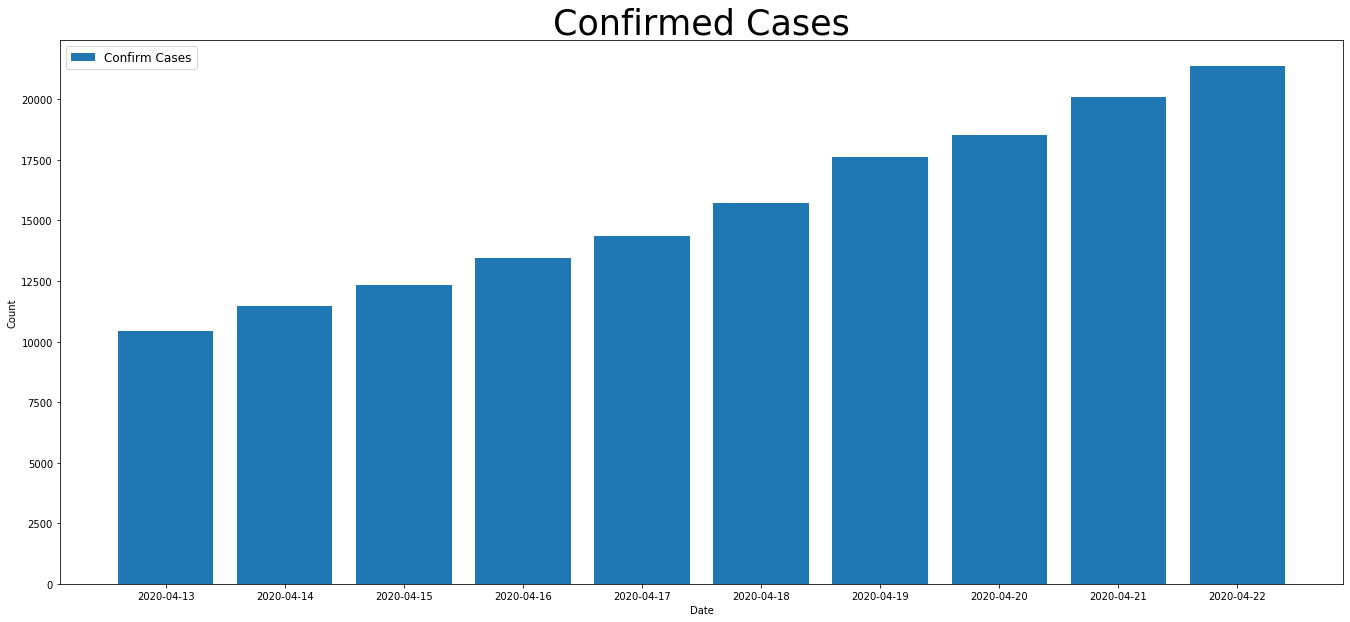

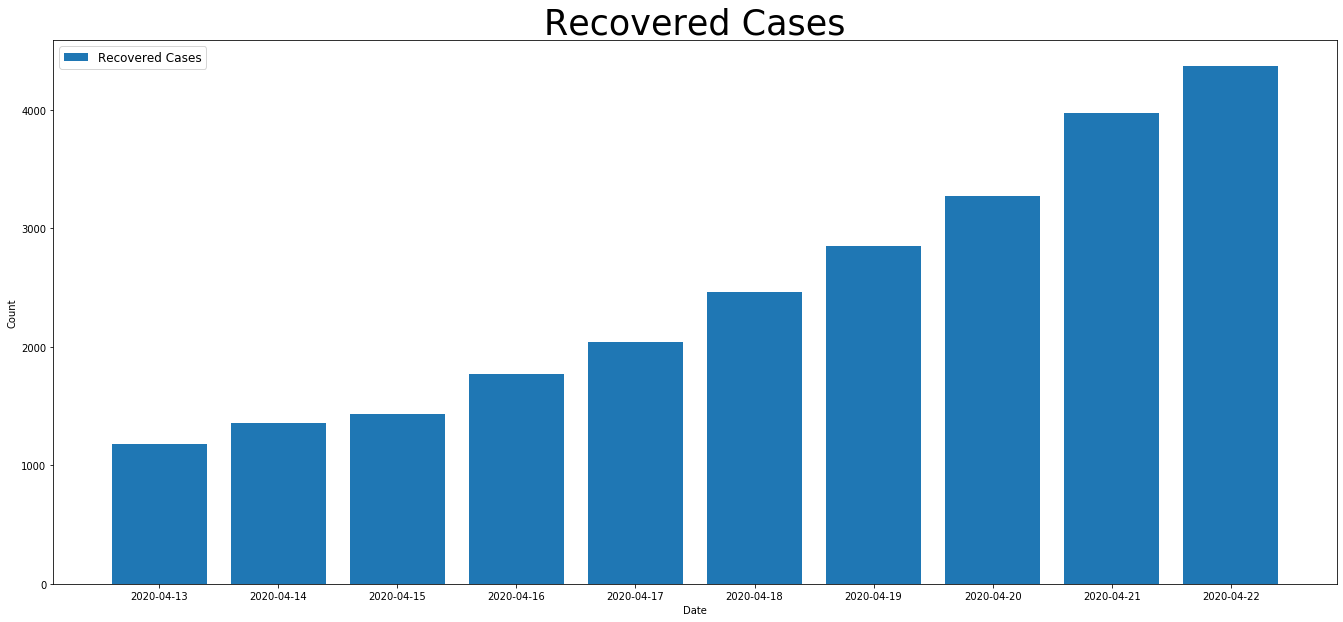

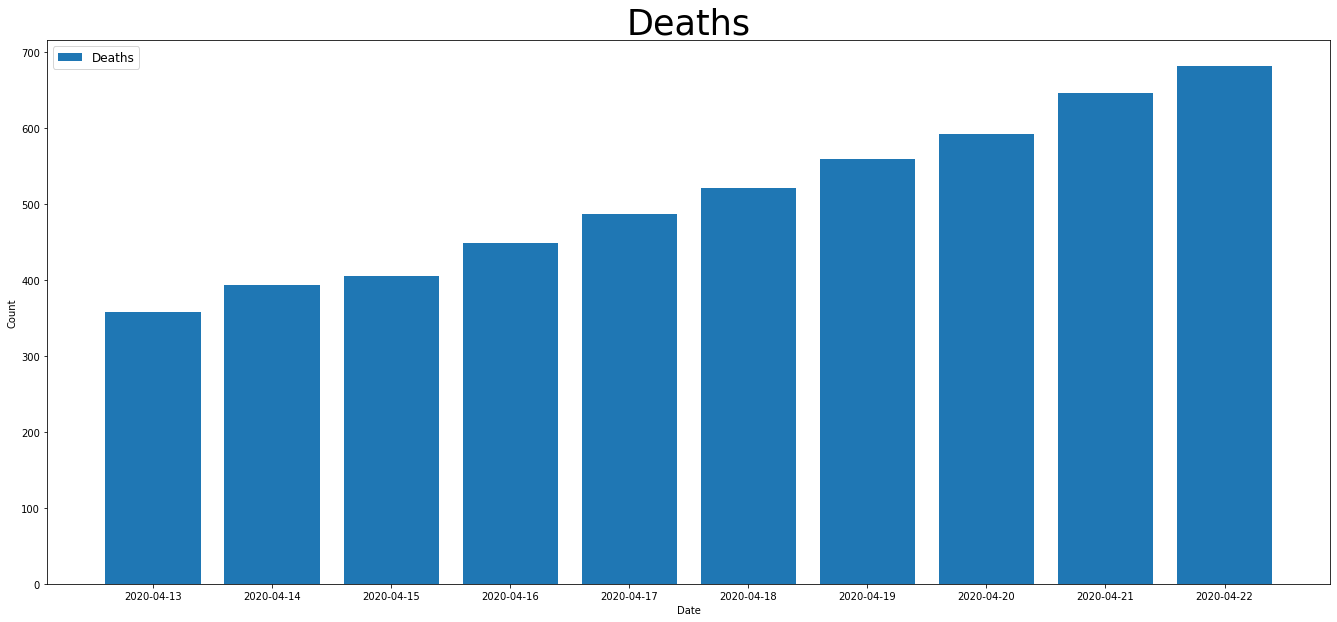

In [22]:
p = pd.read_csv("C:\\Users\\Ammu\\Covid\\Covid_19_India\\covid-19-all.csv")
p = p[p['Country/Region'] ==  "India"]
p= p.tail(10)
plt.figure(figsize=(23,10))
plt.bar(p.Date, p.Confirmed,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.Date, p.Recovered,label="Recovered Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.Date, p.Deaths,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()

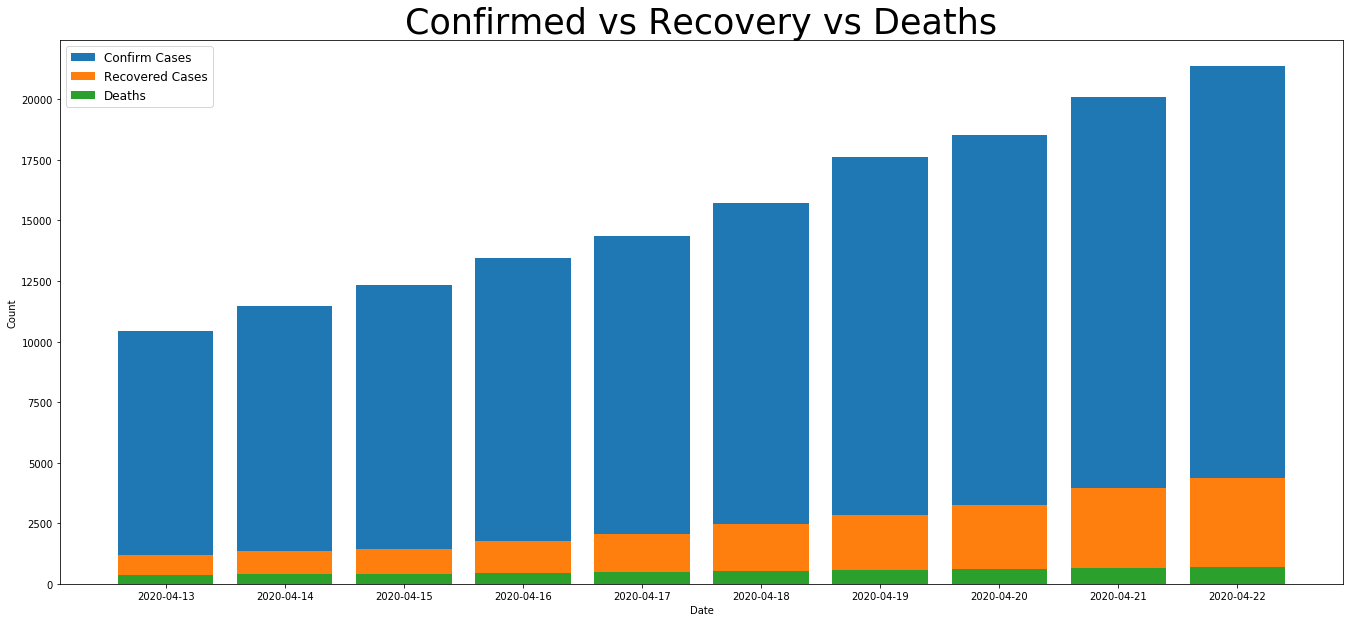

In [23]:
plt.figure(figsize=(23,10))
plt.bar(p.Date, p.Confirmed,label="Confirm Cases")
plt.bar(p.Date, p.Recovered,label="Recovered Cases")
plt.bar(p.Date, p.Deaths,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed vs Recovery vs Deaths',fontsize = 35)
plt.show()

# **Growth Rate and Factor**

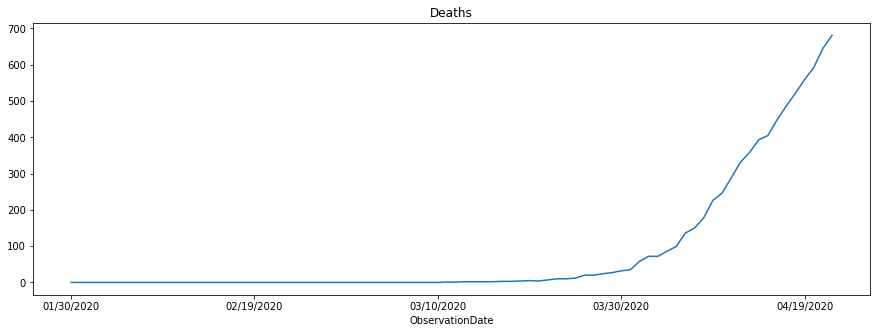

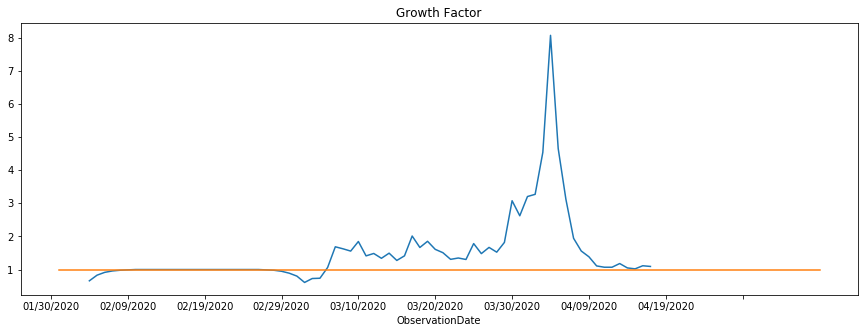

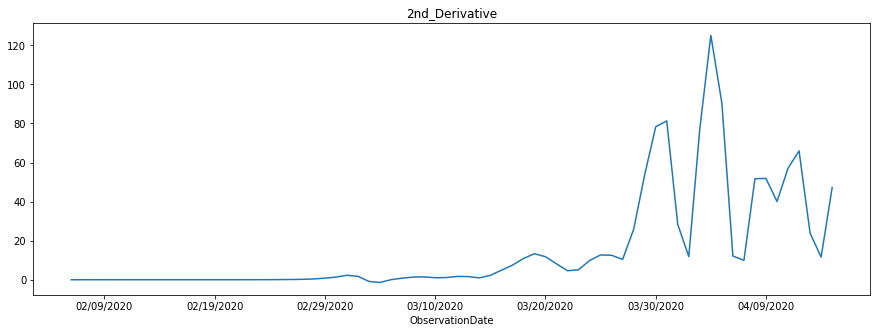

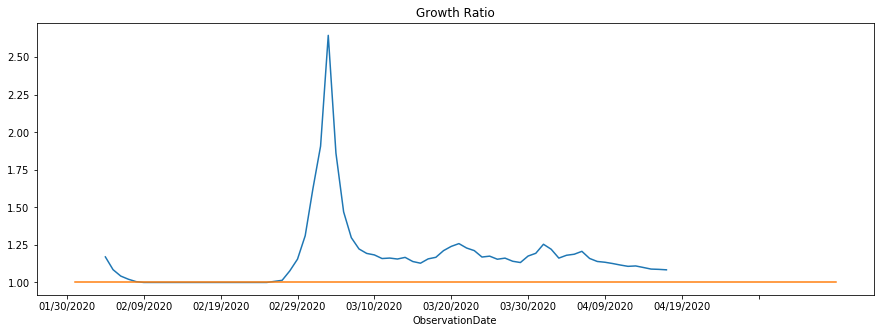

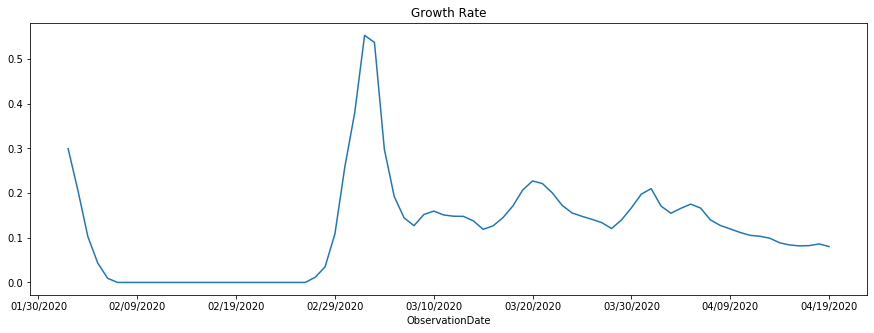

In [24]:
global_data = pd.read_csv("C:\\Users\\Ammu\\Covid\\Covid_19_India\\covid_19_data.csv")
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    f, ax = plt.subplots(figsize=(15,5))
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return 
plot_country_active_confirmed_recovered("India")

# Affect in States

In [25]:
display(Markdown("** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**"))
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Purples',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Greens',subset=["Cure Rate (per 100)"])


** STATE WISE CONFIRMED, DEATH AND CURED CASES of 2019-nCoV**

,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,5221,251,722,5692,4.810000,13.830000
9,Gujarat,2272,95,144,2321,4.180000,6.340000
7,Delhi,2156,47,611,2720,2.180000,28.340000
28,Rajasthan,1801,25,230,2006,1.390000,12.770000
29,Tamil Nadu,1596,18,635,2213,1.130000,39.790000
18,Madhya Pradesh,1592,80,148,1660,5.030000,9.300000
32,Uttar Pradesh,1412,21,165,1556,1.490000,11.690000
30,Telengana,945,23,194,1116,2.430000,20.530000
1,Andhra Pradesh,813,24,120,909,2.950000,14.760000
16,Kerala,427,3,323,747,0.700000,75.640000


In [25]:
state_cases.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,35.0,586.228571,1053.875707,0.0,14.500,46.000,620.0000,5221.00
Deaths,35.0,18.685714,45.935871,0.0,0.000,2.000,17.5000,251.00
Cured,35.0,113.142857,186.391609,0.0,2.500,26.000,136.5000,722.00
Active,35.0,680.685714,1172.094575,0.0,21.000,65.000,828.0000,5692.00
Death Rate (per 100),34.0,2.067353,2.267947,0.0,0.000,1.355,3.4000,8.33
Cure Rate (per 100),34.0,36.487647,30.221503,0.0,13.035,33.430,51.3875,100.00


In [26]:
Total_confirmed = state_cases['Confirmed'].sum()
Total_recovered = state_cases['Cured'].sum()
Total_death = state_cases['Deaths'].sum()

In [27]:
data = [['Confirmed', Total_confirmed], ['Recovered', Total_recovered], ['Death', Total_death]] 
df = pd.DataFrame(data, columns = ['state', 'count']) 
fig = px.pie(df,
             values="count",
             names="state",
             title="Overall Cases",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Confirmed,Cured,Deaths and Active Count

In [28]:
fig = px.bar(state_cases[['State/UnionTerritory', 'Confirmed']].sort_values('Confirmed', ascending=False), 
             y="Confirmed", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Confirmed cases across states')
fig.show()
"""
fig = px.pie(state_cases,
             values="Confirmed",
             names="State/UnionTerritory",
             title="Confirmed cases across states",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()
"""

fig = px.bar(state_cases[['State/UnionTerritory', 'Cured']].sort_values('Cured', ascending=False), 
             y="Cured", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Cured cases across states')
fig.show()
"""
fig = px.pie(state_cases,
             values="Cured",
             names="State/UnionTerritory",
             title="Cured cases across states",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()
"""

fig = px.bar(state_cases[['State/UnionTerritory', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Deaths across States')
fig.show()
"""
fig = px.pie(state_cases,
             values="Deaths",
             names="State/UnionTerritory",
             title="Deaths across States",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()
"""

fig = px.bar(state_cases[['State/UnionTerritory', 'Active']].sort_values('Active', ascending=False), 
             y="Active", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Active Cases across States')
fig.show()
"""

fig = px.pie(state_cases,
             values="Active",
             names="State/UnionTerritory",
             title="Active Cases across States",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()
"""

'\n\nfig = px.pie(state_cases,\n             values="Active",\n             names="State/UnionTerritory",\n             title="Active Cases across States",\n             template="seaborn")\nfig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")\nfig.show()\n'

# Confirmed vs Recovery

In [29]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py

figure = bubbleplot(dataset=state_cases, x_column='Confirmed', y_column='Cured', 
    bubble_column='State/UnionTerritory',size_column='Cured', color_column='State/UnionTerritory', 
    x_title="Confirm", y_title="Recovery", title='Confirm vs Recovery',
     scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

C:\Users\Ammu\anaconda3\lib\site-packages\plotly\offline\offline.py:160: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



 # Confirmed vs Death

In [30]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py

figure = bubbleplot(dataset=state_cases, x_column='Confirmed', y_column='Deaths', 
    bubble_column='State/UnionTerritory',size_column='Deaths', color_column='State/UnionTerritory', 
    x_title="Confirm", y_title="Recovery", title='Confirm vs Deaths',
     scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

# Cured per 100 

In [31]:
#f, ax = plt.subplots(figsize=(15,5))
#h=pd.pivot_table(state_cases,columns='State/UnionTerritory',values=["Cure Rate (per 100)"])
#sns.heatmap(h,cmap=['skyblue','salmon','green'],linewidths=0.05)

fig = px.bar(state_cases[['State/UnionTerritory', 'Cure Rate (per 100)']].sort_values('Cure Rate (per 100)', ascending=False), 
             y="Cure Rate (per 100)", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Cure Rate across States')
fig.show()




# Deaths per 100

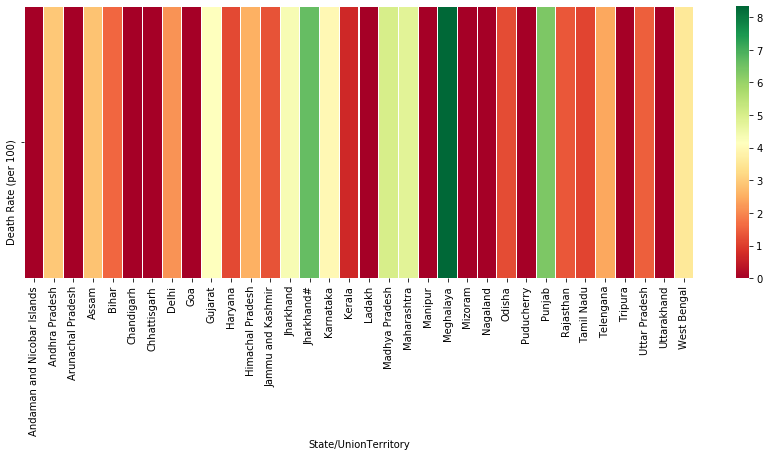

In [32]:
f, ax = plt.subplots(figsize=(15,5))
h=pd.pivot_table(state_cases,columns='State/UnionTerritory',values=["Death Rate (per 100)"])
sns.heatmap(h,cmap="RdYlGn",linewidths=0.05)

fig = px.bar(state_cases[['State/UnionTerritory', 'Death Rate (per 100)']].sort_values('Death Rate (per 100)', ascending=False), 
             y="Death Rate (per 100)", x="State/UnionTerritory", color='State/UnionTerritory', 
             log_y=True, template='ggplot2', title='Death Rate across States')
fig.show()


**I think  the number of cases is more in coastal than other part of India so creating a new dataframe and validating the point **

**Creating a new dataframe of all the coastal states in India**

In [33]:
coastal = pd.DataFrame()
coastal = state_cases.iloc[["0","1","8","9","14","15","18","24","25","28","33"]]
coastal["Area"] = [8249,162970,3702,196024,191791,38863,307713,155707,492,130058,88752]
coastal

C:\Users\Ammu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100),Area
0,Andaman and Nicobar Islands,17,0,11,28,0.00,64.71,8249
1,Andhra Pradesh,813,24,120,909,2.95,14.76,162970
8,Goa,7,0,7,14,0.00,100.00,3702
9,Gujarat,2272,95,144,2321,4.18,6.34,196024
14,Jharkhand#,45,3,0,42,6.67,0.00,191791
15,Karnataka,425,17,129,537,4.00,30.35,38863
18,Madhya Pradesh,1592,80,148,1660,5.03,9.30,307713
24,Nagaland#,0,0,0,0,NaN,NaN,155707
25,Odisha,82,1,30,111,1.22,36.59,492
28,Rajasthan,1801,25,230,2006,1.39,12.77,130058


**Coastal and Non Coastal Confirmation**

In [34]:
coastal_confirmed = (coastal['Confirmed'].sum())
non_coastal_confirmed = Total_confirmed- coastal_confirmed

**Coastal and Non Coastal Area**

In [35]:
coastal_state_area = (coastal['Area'].sum())
non_coastal_state_area = 1582422

In [36]:
print("Coastal Area=" + str(coastal_state_area))
print("Non Coastal Area="+ str(non_coastal_state_area))

Coastal Area=1284321
Non Coastal Area=1582422


**Coastal Confirmed per 1000sqkm**

In [37]:
ccpa = coastal_confirmed/coastal_state_area
ccpa = ccpa*1000
ccpa

5.52821296233574

****Non Coastal Confirmed per 1000sqkm****

In [38]:
nccpa = non_coastal_confirmed/1582422
nccpa = nccpa * 1000
nccpa

8.479406883878005

# **Hospitals and Beds in India**

**This file contain Health Management Information System data and National Health Profile Data and we deal diffrently with them**

# **Health Management Information System**

In [39]:
hospital  = pd.read_csv("C:\\Users\\Ammu\\Covid\\Covid_19_India\\HospitalBedsIndiaLocations.csv")
hmis = hospital.loc[:,['Sno','State/UT','Latitude','Longitude','NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS','NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS','TotalPublicHealthFacilities_HMIS','NumPublicBeds_HMIS']]
hmis = hmis.rename(columns={"State/UT":"State","NumPrimaryHealthCenters_HMIS":"Primary","NumCommunityHealthCenters_HMIS":"Community","NumSubDistrictHospitals_HMIS":"SubDistrict","NumDistrictHospitals_HMIS":"District","TotalPublicHealthFacilities_HMIS":"Total","NumPublicBeds_HMIS":"Public beds"})
hmis = hmis.fillna(0)
hmis.head()


,Sno,State,Latitude,Longitude,Primary,Community,SubDistrict,District,Total,Public beds
0,1,Andaman & Nicobar Islands,11.6234,92.7265,27,4,0.0,3,34,1246
1,2,Andhra Pradesh,15.9129,79.7400,1417,198,31.0,20,1666,60799
2,3,Arunachal Pradesh,27.0844,93.6053,122,62,0.0,15,199,2320
3,4,Assam,26.1433,91.7898,1007,166,14.0,33,1220,19115
4,5,Bihar,25.5941,85.1376,2007,63,33.0,43,2146,17796


 **Descripiton of Hospitlas and Beds**

In [46]:
hmis.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,36.0,18.500000,10.535654,1.0000,9.750000,18.5000,27.25000,36.0000
Latitude,36.0,22.757825,6.349656,10.8505,19.341725,23.3020,27.03895,34.0837
Longitude,36.0,81.552478,7.359171,72.1833,75.713900,79.0193,88.01930,94.5624
Primary,36.0,830.527778,906.911792,4.0000,81.500000,518.5000,1384.75000,3277.0000
Community,36.0,154.666667,178.379531,2.0000,15.250000,80.5000,212.50000,671.0000
SubDistrict,36.0,34.861111,58.464716,0.0000,1.000000,12.5000,47.00000,310.0000
District,36.0,27.861111,30.857417,1.0000,9.000000,21.5000,35.50000,174.0000
Total,36.0,1047.916667,1122.109273,8.0000,107.250000,677.0000,1816.00000,4122.0000
Public beds,36.0,20528.444444,22563.597553,250.0000,2640.000000,12434.5000,38482.75000,72616.0000


**Tree Plot by Total Hospitals**

In [40]:
fig = px.treemap(hmis, path=['State'], values='Total',
                  color='Total', hover_data=['State','Primary','Community','SubDistrict','District',"Public beds"],
                  color_continuous_scale='burgyl')
fig.show()

**Tree Plot by Total Beds **

In [41]:
fig = px.treemap(hmis, path=['State'], values='Public beds',
                  color='Public beds', hover_data=['State','Primary','Community','SubDistrict','District',"Total"],
                  color_continuous_scale='burgyl')
fig.show()

**HMIS Hospitals in World Map**

In [42]:
#no graph populting
import folium
india = folium.Map(location=[20.5937,78.9629 ], zoom_start=5,tiles='cartodbpositron')

for lat, lon,State,Primary ,Community, SubDistrict, District, Total in zip(hmis['Latitude'], hmis['Longitude'],hmis['State'],hmis['Total'],hmis['Primary'],hmis['Community'],hmis['SubDistrict'],hmis['District']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('State:' + str(State) + '<br>'
                             'Total Hospitals:' + str(Total) + '<br>'
                              'Primary :' + str(Primary) + '<br>'
                             'Community:' + str(Community) + '<br>'
                             'Sub District:'+ str(SubDistrict) + '<br>'
                             'District:'+ str(District) + '<br>'

                             ),
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(india)
india

# National Health Profile

In [43]:
nhp = hospital.loc[:,['Sno','State/UT','Latitude','Longitude','NumRuralHospitals_NHP18','NumRuralBeds_NHP18','NumUrbanHospitals_NHP18','NumUrbanBeds_NHP18']]
nhp = nhp.rename(columns={'State/UT':"State",'NumRuralHospitals_NHP18':"Rural_hospitals",'NumRuralBeds_NHP18':"Rural_beds",'NumUrbanHospitals_NHP18':"Urban_hospitals",'NumUrbanBeds_NHP18':"Urban_beds"})
nhp = nhp.fillna(0)
nhp['Total_hospitals'] = nhp['Rural_hospitals'] + nhp['Urban_hospitals']
nhp['Total_beds'] = nhp['Rural_beds'] + nhp['Urban_beds']
nhp.head()


,Sno,State,Latitude,Longitude,Rural_hospitals,Rural_beds,Urban_hospitals,Urban_beds,Total_hospitals,Total_beds
0,1,Andaman & Nicobar Islands,11.6234,92.7265,27,575,3,500,30,1075
1,2,Andhra Pradesh,15.9129,79.7400,193,6480,65,16658,258,23138
2,3,Arunachal Pradesh,27.0844,93.6053,208,2136,10,268,218,2404
3,4,Assam,26.1433,91.7898,1176,10944,50,6198,1226,17142
4,5,Bihar,25.5941,85.1376,930,6083,103,5936,1033,12019


 **Descripiton of Hospitlas and Beds**

In [44]:
nhp.describe().T

,count,mean,std,min,25%,50%,75%,max
Sno,36.0,18.500000,10.535654,1.0000,9.750000,18.5000,27.25000,36.0000
Latitude,36.0,22.757825,6.349656,10.8505,19.341725,23.3020,27.03895,34.0837
Longitude,36.0,81.552478,7.359171,72.1833,75.713900,79.0193,88.01930,94.5624
Rural_hospitals,36.0,550.277778,862.228727,0.0000,23.750000,240.5000,695.25000,4442.0000
Rural_beds,36.0,7766.333333,9955.553646,0.0000,623.500000,5735.0000,10251.00000,40179.0000
Urban_hospitals,36.0,104.777778,129.946387,0.0000,13.250000,57.5000,128.75000,525.0000
Urban_beds,36.0,11977.027778,15086.566553,0.0000,1369.750000,5085.0000,17198.25000,58882.0000
Total_hospitals,36.0,655.055556,927.461542,4.0000,40.500000,354.5000,816.50000,4635.0000
Total_beds,36.0,19743.361111,23492.316477,240.0000,2302.250000,11445.5000,25497.00000,78566.0000


**Tree Plot by Total Hospitals **

In [44]:
fig = px.treemap(nhp, path=['State'], values='Total_hospitals',
                  color='Total_hospitals', hover_data=['State','Rural_hospitals','Rural_beds','Urban_hospitals','Urban_beds','Total_beds'],
                  color_continuous_scale='burgyl')
fig.show()

**Tree Plot by Total Beds **

In [45]:
fig = px.treemap(nhp, path=['State'], values='Total_beds',
                  color='Total_beds', hover_data=['State','Rural_hospitals','Rural_beds','Urban_hospitals','Urban_beds','Total_hospitals'],
                  color_continuous_scale='burgyl')
fig.show()

**NHP hospitals in world map**

In [46]:
#no graph populating
import folium
india = folium.Map(location=[20.5937,78.9629 ], zoom_start=5,tiles='cartodbpositron')

for lat, lon,State,Rural_hospitals ,Rural_beds, Urban_hospitals, Urban_beds, Total_hospitals,Total_beds in zip(nhp['Latitude'], nhp['Longitude'],nhp['State'],nhp['Rural_hospitals'],nhp['Rural_beds'],nhp['Urban_hospitals'],nhp['Urban_beds'],nhp['Total_hospitals'],nhp['Total_beds']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('State:' + str(State) + '<br>'
                             'Rural Hospitals:' + str(Rural_hospitals) + '<br>'
                              'Rural Beds :' + str(Rural_beds) + '<br>'
                             'Urban Hospitals:' + str(Urban_hospitals) + '<br>'
                             'Urban Beds:'+ str(Urban_beds) + '<br>'
                             'Total Hospitals:'+ str(Total_hospitals) + '<br>'
                             'Total Beds:'+ str(Total_beds) + '<br>'

                             ),
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(india)
india

# Prediction by Prophet

**Looking into data**

In [47]:
pred = pd.read_csv("C:\\Users\\Ammu\\Covid\\Covid_19_India\\covid-19-all.csv")
pred = pred[pred["Country/Region"]=="India"]
pred = pred.fillna(0)
predgrp = pred.groupby("Date")[["Confirmed","Recovered","Deaths"]].sum().reset_index()
predgrp.tail()

,Date,Confirmed,Recovered,Deaths
79,2020-04-18,15722.0,2463.0,521.0
80,2020-04-19,17615.0,2854.0,559.0
81,2020-04-20,18539.0,3273.0,592.0
82,2020-04-21,20080.0,3975.0,645.0
83,2020-04-22,21370.0,4370.0,681.0


**Description of Data**

In [42]:
predgrp.describe().T


,count,mean,std,min,25%,50%,75%,max
Confirmed,84.0,2707.916667,5283.819135,1.0,3.0,67.5,2134.25,21370.0
Recovered,84.0,372.785714,882.570780,0.0,3.0,4.0,158.75,4370.0
Deaths,84.0,86.380952,172.978020,0.0,0.0,1.0,61.50,681.0


**Model**

In [48]:
pred_cnfrm = predgrp.loc[:,["Date","Confirmed"]]
pr_data = pred_cnfrm
pr_data.columns = ['ds','y']
m=Prophet()
m.fit(pr_data)
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-17.139797,-448.193915,352.324733,-17.139797,-17.139797,-46.897312,-46.897312,-46.897312,-46.897312,-46.897312,-46.897312,0.0,0.0,0.0,-64.037109
1,2020-01-31,-15.865479,-484.760616,291.179249,-15.865479,-15.865479,-77.529222,-77.529222,-77.529222,-77.529222,-77.529222,-77.529222,0.0,0.0,0.0,-93.394701
2,2020-02-01,-14.591160,-433.057050,329.354438,-14.591160,-14.591160,-32.920572,-32.920572,-32.920572,-32.920572,-32.920572,-32.920572,0.0,0.0,0.0,-47.511731
3,2020-02-02,-13.316841,-399.618294,416.391893,-13.316841,-13.316841,22.155317,22.155317,22.155317,22.155317,22.155317,22.155317,0.0,0.0,0.0,8.838476
4,2020-02-03,-12.042522,-362.257086,434.357748,-12.042522,-12.042522,47.040323,47.040323,47.040323,47.040323,47.040323,47.040323,0.0,0.0,0.0,34.997801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2020-05-18,46092.967800,43206.138042,48870.243811,43141.358285,48790.468213,47.040323,47.040323,47.040323,47.040323,47.040323,47.040323,0.0,0.0,0.0,46140.008123
110,2020-05-19,47095.070907,43999.954314,50029.160642,43964.186797,50016.593428,40.404631,40.404631,40.404631,40.404631,40.404631,40.404631,0.0,0.0,0.0,47135.475538
111,2020-05-20,48097.174015,44818.889127,51233.659039,44800.813947,51155.674151,47.746834,47.746834,47.746834,47.746834,47.746834,47.746834,0.0,0.0,0.0,48144.920849
112,2020-05-21,49099.277122,45623.770729,52198.607783,45606.975704,52334.619481,-46.897312,-46.897312,-46.897312,-46.897312,-46.897312,-46.897312,0.0,0.0,0.0,49052.379810


**Graphical representation of Prediction**

**Prediction for next 15 days**

In [49]:
cnfrm = forecast.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm.columns = ['Date','Confirm']
cnfrm.tail(30)

,Date,Confirm
84,2020-04-23,21040.390118
85,2020-04-24,22042.493225
86,2020-04-25,23044.596332
87,2020-04-26,24046.699439
88,2020-04-27,25048.802547
89,2020-04-28,26050.905654
90,2020-04-29,27053.008761
91,2020-04-30,28055.111869
92,2020-05-01,29057.214976
93,2020-05-02,30059.318083
